In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

In [18]:
import sys

In [5]:
wine_file = "wine_final.csv"

In [6]:
wine_df = pd.read_csv(wine_file, sep=",")

In [7]:
# wine_df.head()

# -= Sorting wine =-

## Sorting by color

In [8]:
white_wines = wine_df[wine_df["color"] == "white"]

In [9]:
white_wines = white_wines[["variety", "points", "price"]]

In [10]:
red_wines = wine_df[wine_df["color"] == "red"]

In [11]:
red_wines = red_wines[["variety", "points", "price"]]

## Sorting by rating

In [12]:
wine_df = wine_df.sort_values(by="country")

In [84]:
wines_by_countries = wine_df.groupby("country")["title"].apply(lambda titles: ','.join(titles))

In [124]:
sorted_wines = wine_df.groupby("country")["points", "price"].mean().reset_index().sort_values(by="country")

In [133]:
unique_wines = wine_df.groupby("country")["title"].nunique().reset_index(name="wines_count")

In [ ]:
# unique_wines

In [135]:
sorted_wines["wines_count"] = unique_wines["wines_count"]

In [ ]:
sorted_wines

In [145]:
sorted_wines.shape[0]

42

## Graph by rating

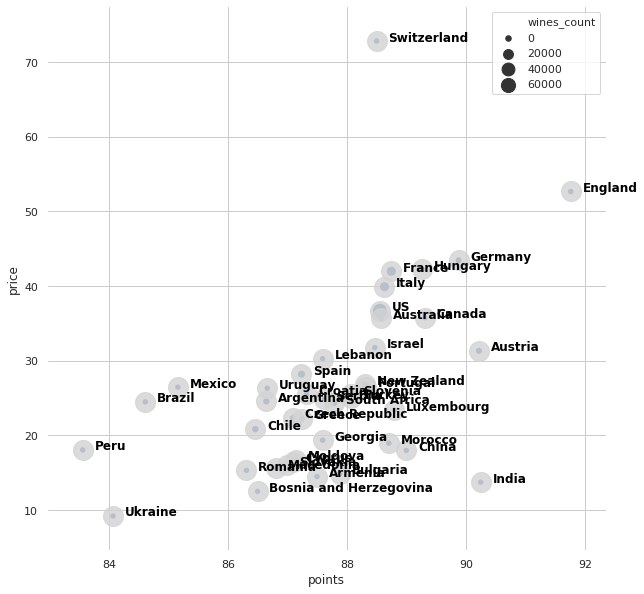

In [159]:
sns.set(style="whitegrid")

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
clarity_ranking = list(sorted_wines["country"])



sns.scatterplot(x="points", y="price",
                size="wines_count",
                palette="ch:r=-.2,d=.3_r",
                markers=True, sizes=(30, 200),
                hue_order=clarity_ranking,
                linewidth=0,
                data=sorted_wines, ax=ax)

p1=sns.regplot(data=sorted_wines, x="points", y="price", fit_reg=False, color="lightgrey", scatter_kws={'s':400})

for line in range(0,sorted_wines.shape[0]):
     p1.text(sorted_wines.points[line]+0.2, sorted_wines.price[line], sorted_wines.country[line], horizontalalignment='left', size='medium', color='black', weight='semibold')

## Sorting by price

## Winery sorted by rating

# -= Graphs =-

## Top wines rating graph

## Top wines price graph

## Top wineries graph